In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### This is our dataset of Customer Churn Prediction.

In [2]:
# importing data
data = pd.read_csv('datasets/churn_prediction.csv')

In [3]:
# First look
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
#shape of the data
data.shape

(28382, 21)

In [5]:
#columns of data
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [6]:
data.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

### Identificaiton of Data types 

In [7]:
#different data types
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [8]:
numeric_columns = data.select_dtypes(include = ['int','float']).columns
numeric_columns

Index(['dependents', 'city', 'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance'],
      dtype='object')

In [9]:
object_columns = data.select_dtypes(include = ['object']).columns
object_columns

Index(['gender', 'occupation', 'last_transaction'], dtype='object')

### Mean Value

In [10]:
#mean of age
print(data['age'].mean())

#mean of age who are likely to churn
print(data[data['churn'] == 1]['age'].mean())

48.208336269466564
47.461216730038025


In [11]:
data[data['churn'] == 1].mean()

customer_id                       15093.581369
vintage                            2088.417681
age                                  47.461217
dependents                            0.417917
city                                794.668432
customer_nw_category                  2.234601
branch_code                         995.714068
current_balance                    5220.884321
previous_month_end_balance         8109.794051
average_monthly_balance_prevQ      8543.094684
average_monthly_balance_prevQ2     8841.608291
current_month_credit               6786.948224
previous_month_credit              5887.110985
current_month_debit                8894.855785
previous_month_debit               7062.020549
current_month_balance              6887.874426
previous_month_balance             8793.403987
churn                                 1.000000
dtype: float64

In [12]:
# observation with minimum current balance
data[data['current_balance'] == data['current_balance'].min()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
12608,13467,2140,80,Male,0.0,retired,1096.0,1,27,-5503.96,...,1694.57,868.26,9471.01,2680.04,15229.44,7859.37,1050.17,2002.97,1,2019-12-26


In [13]:
# observation with maximun current balance
data[data['current_balance'] == data['current_balance'].max()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
9908,10575,2223,90,NaN,NaN,self_employed,243.0,2,2542,5905904.03,...,5700289.57,5010170.1,5232.34,1452.87,17327.27,17248.3,5778184.77,5720144.5,0,2019-12-13


The __mean value of Age of Customers__ and the __mean value of Age of Customers who are likely to churn__ is around 48

In [14]:
#current balance mean
print(data['current_balance'].mean())

#current balance of customers who are likely to churn
print(data[data['churn']==1]['current_balance'].mean())

7380.55180360792
5220.884321292776


*  The __mean value of current balance of Customers___  is __7380.55180360792__ 
*  The __mean value of Current Balance of Customers__ who are likely to churn is __5220.884321292776__.

### Median

In [15]:
# Display Mean, Median and Mode for Age
print("Maximun:",data['age'].max())
print('Minimum:',data['age'].min())
print("Mean   :",data['age'].mean())
print("Median :",data['age'].median())
print("Mode   :",data['age'].mode())



Maximun: 90
Minimum: 1
Mean   : 48.208336269466564
Median : 46.0
Mode   : 0    90
dtype: int64


In [16]:
print("Age Count :- \n",data.age.value_counts())



Age Count :- 
 90    1003
40     722
43     711
42     699
37     691
      ... 
3       34
89      24
88      20
2       17
1        4
Name: age, Length: 90, dtype: int64


*  __Median__ of age is 46. 
* That means 46 is the __50th percentile__ of the age of customers.

### Standard Deviation and Variance

In [17]:
print(data['current_balance'].std())
print(data['current_balance'].var())

42598.711923233204
1814650257.5186107


*  __standard deviation__  for current balance of the customers is 42598.711923233204
*  __variance__ for current balance of the customers is 1814650257.5186107

### Describe Function

describe() function is used to view some basic __descriptive statistical details__ like __percentile, mean, std etc.__ of a data frame.

In [18]:
data.describe(include=[int, float])

,dependents,city,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
count,25919.000000,27579.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04
mean,0.347236,796.109576,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03
std,0.997661,432.872102,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04
min,0.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03
25%,0.000000,409.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03
50%,0.000000,834.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03
75%,0.000000,1096.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03
max,52.000000,1649.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06


* count represents total number of data points.
* mean represents average value
* std represents standard deviation
* min represents the minimum value of the column
* 25% represents 25th percentile that means 25% data fall below this value.
* 50% represents 50th percentile that means 50% data fall below this value. This is __Median__
* 75% represents the 75th percentile here
* max represents the maximum value of the column

In [19]:
churn_age = data[data['churn']==1]['age']

In [29]:
print("mean :",churn_age.mean())
print("median:",churn_age.median())

mean : 47.461216730038025
median: 45.0


A __Histogram__ visualises the distribution of data over a continuous interval. 
Each bar in a histogram represents the tabulated __frequency__ at each __interval/bin__. 
In simple words height represents the frequency for respective bin (interval)

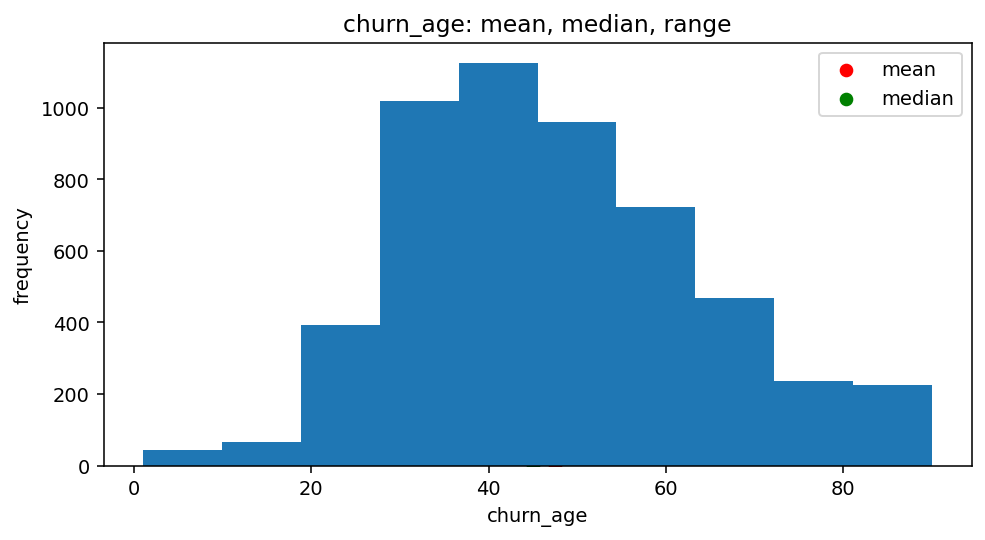

In [27]:
# setting image resolution
plt.figure(figsize = (8,4), dpi = 140)

# Plotting histogram and descriptive summary
plt.scatter(churn_age.mean(), 0, label = 'mean', color = 'red')
plt.scatter(churn_age.median(), 0, label = 'median', color = 'green')

plt.hist(churn_age,bins=10)

# axes labels
plt.xlabel('churn_age')
plt.ylabel('frequency')
plt.title('churn_age: mean, median, range')
plt.legend()

In [22]:
#* Mean Value is higher than the Median Value
#* The peak occurs at the interval (36,45) that means highest number of customers age lie in this interval
#* Most customer age between 30 and 65


SyntaxError: invalid syntax (<ipython-input-22-cfb33816e16d>, line 1)

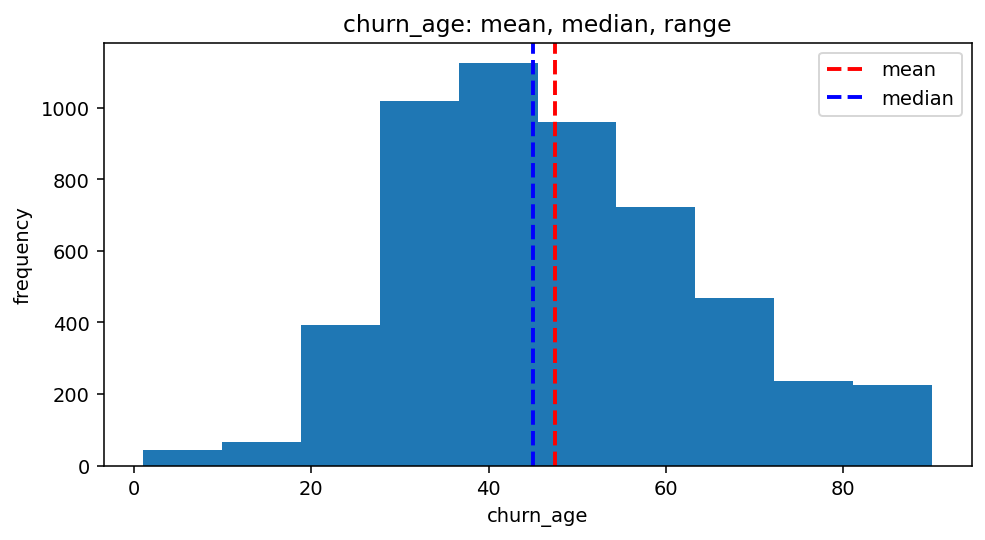

In [31]:
# setting image resolution
plt.figure(figsize = (8,4), dpi = 140)


# Plotting histogram and descriptive summary
plt.axvline(churn_age.mean(), color='r', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(churn_age.median(), color='b', linestyle='dashed', linewidth=2, label='median')

plt.hist(churn_age,bins=10)

# axes labels
plt.xlabel('churn_age')
plt.ylabel('frequency')
plt.title('churn_age: mean, median, range')
plt.legend()


